<a href="https://colab.research.google.com/github/alejandromunizsiques/Ejercicios-Coding-Dojo/blob/main/Fraudes_Tarjeta_de_credito_prueba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instrucciones de la prueba

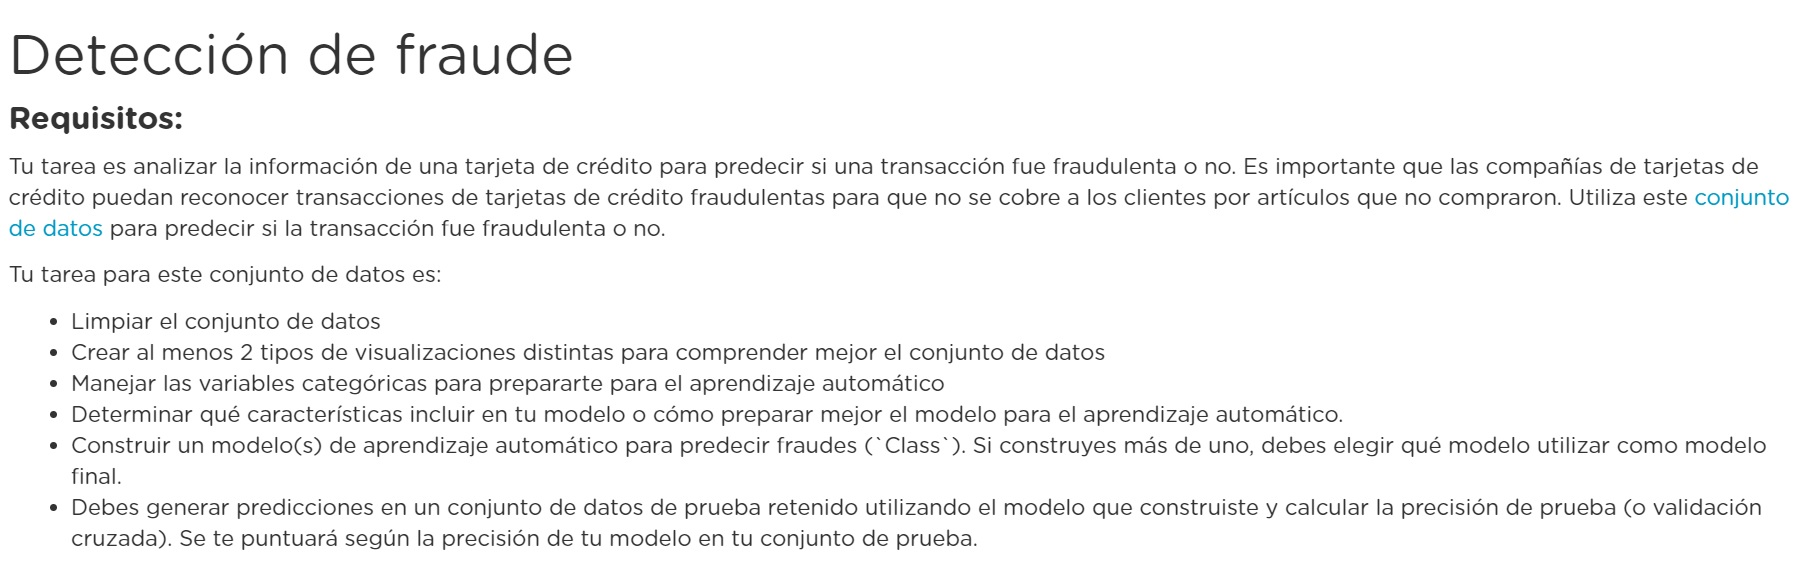

# Diccionario de datos

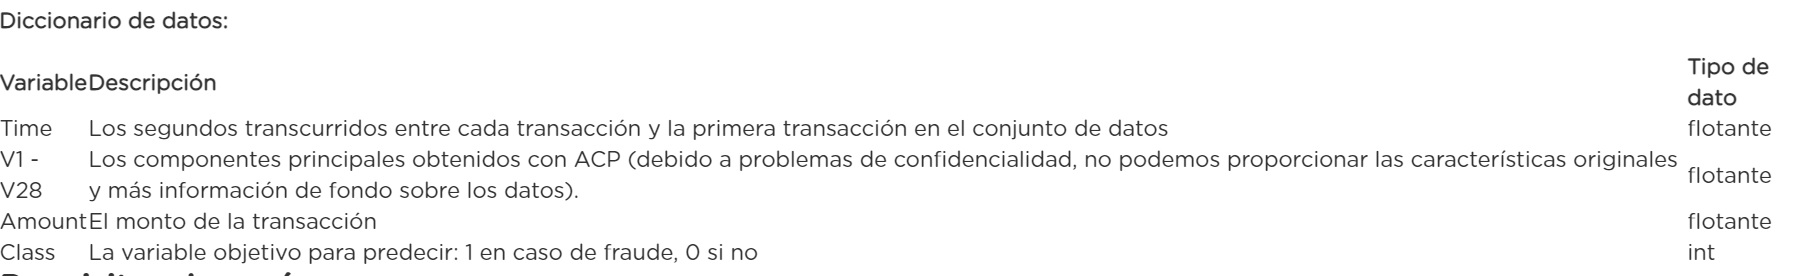

# Librerias

In [29]:
import pandas as pd
import numpy as py
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.metrics import classification_report

# Montaje del dataset

In [30]:
df = pd.read_csv('/content/drive/MyDrive/Data Science Coding Dojo/Pruebas finales/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Info dataset

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Analisis Exploratorio

## Distibucion de clases

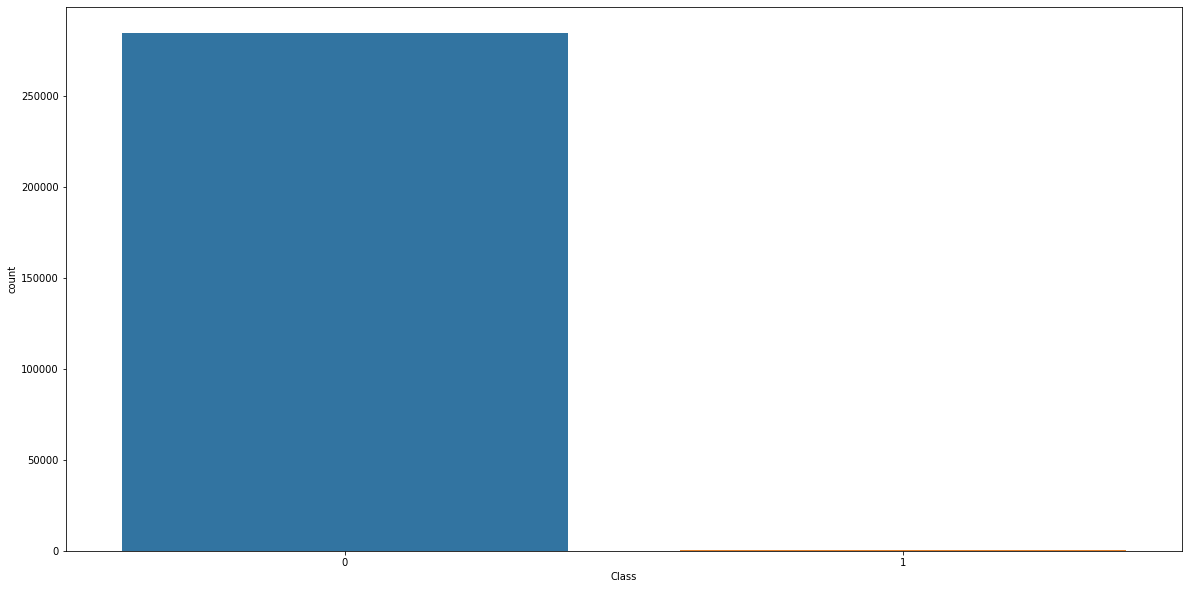

In [32]:
plt.figure(figsize=(20,10))
sns.countplot(x = "Class" ,data = df)


Se determina un gran desequilidrio entre clases, por lo tanto se descarta el uso del Accuracy como metrica de evaluacion de los modelos a probar, ademas de estratificar los datos en funcion del target

In [33]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [34]:
from collections import Counter
target =df.values[:, -1]
counter = Counter(target)

for k, v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.2f%%' % (k,v,per))

Class=0, Count=284315, Percentage=99.83%
Class=1, Count=492, Percentage=0.17%


## Montos vs Fraudes

(0.0, 700.0)

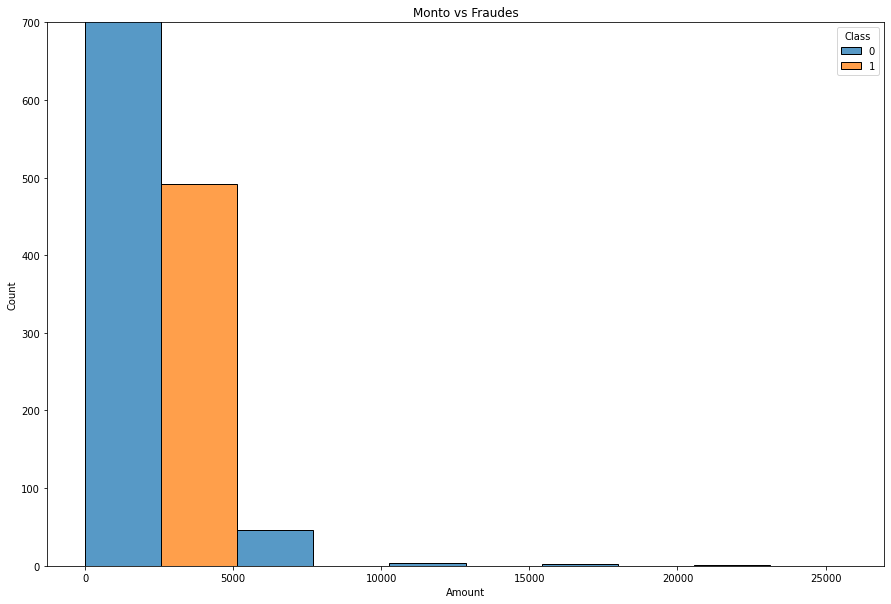

In [57]:

plt.figure(figsize=(15,10))
sns.histplot(x = "Amount" ,hue="Class",multiple="dodge", data = df, bins = 5)
plt.title("Monto vs Fraudes")
plt.ylim(0, 700)

Se puede observar que los fraudes se encuentran en el rango entre los 0 y 5000 unidades monetarias, la cual nos muetra que los fraudes no son por montos altos y que se encuentran mas ceranos a la media del monto

## tiempo vs fraude

(0.0, 200.0)

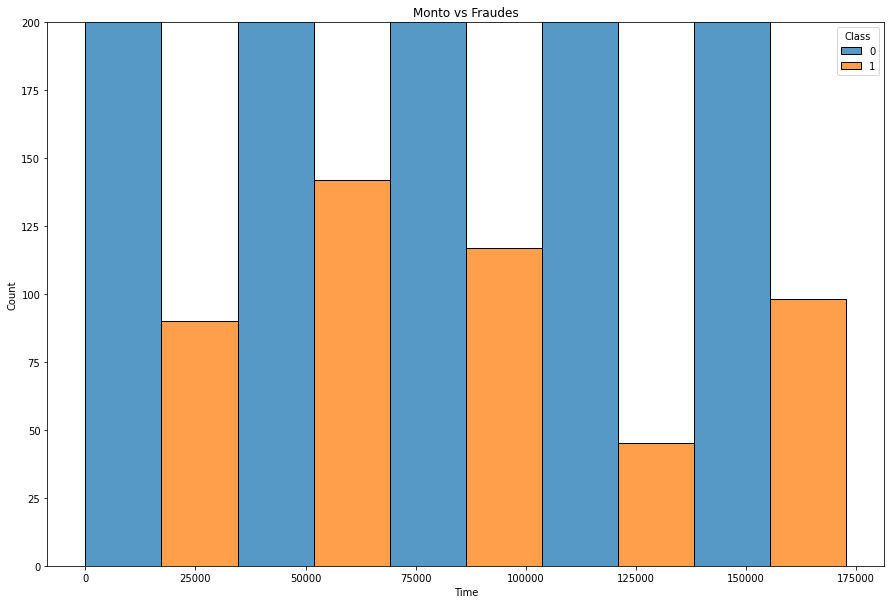

In [60]:
plt.figure(figsize=(15,10))
sns.histplot(x = "Time" ,hue="Class",multiple="dodge", data = df, bins = 5)
plt.title("Monto vs Fraudes")
plt.ylim(0, 200)

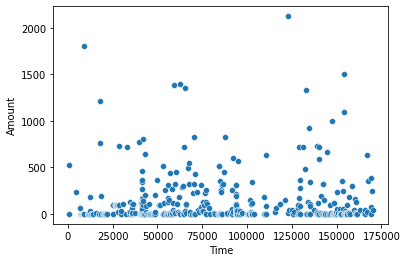

In [37]:
Filtro = df["Class"] == 1
Fraudes = df[Filtro]
sns.scatterplot(x = "Time", y = "Amount", data = Fraudes)

No se logra apreciar a simple vista un comportamiento claro con respecto al tiempo y la cantidad dinero en el caso de los fraudes, 

# Determinacion de Features a traves de PCA

In [65]:
X = df.drop(["Class"],axis=1)
y = df["Class"]

# Escalamiento de los datos 

scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)

In [67]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(scaled_df)

array([[ 0.41663045, -2.53266428, -0.67714014, ...,  0.8331573 ,
         0.27581306, -0.02083772],
       [-0.39345348, -2.0773255 , -0.53261666, ..., -0.99182296,
         0.76458219,  0.01490406],
       [ 1.86852545, -2.53349699, -0.01347203, ..., -0.59240059,
         0.21358778,  0.13526557],
       ...,
       [-0.19406338,  2.07078798,  0.03405826, ..., -0.29548329,
        -0.24503234, -0.00392092],
       [-0.46608925,  1.22539363, -0.10748992, ...,  0.95472958,
        -1.07832866,  0.0242546 ],
       [ 0.76759651,  1.90590292,  0.08918445, ...,  0.3353339 ,
        -0.45055744,  0.10879846]])

## Analisis del Codo (PCA)

Text(0, 0.5, 'Proportion of Explained Variance')

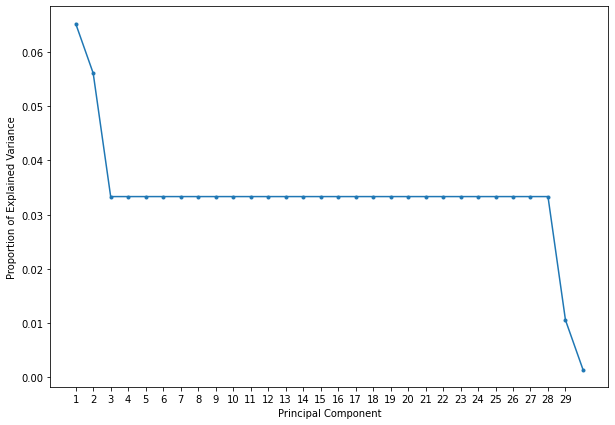

In [72]:
plt.figure(figsize=(10,7))
plt.plot(range(1, 31), pca.explained_variance_ratio_[:30], marker = '.')
plt.xticks(ticks = range(1, 30))
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')

A pesar de que el codo es presentado en el componente numero 3, para poder alcanzar un rango optimo de varianza explicada (70-80%), se ha elegido 20 Componentes, el cual el 75.5% de la varianza, en el caso de demoras en la ejecucion del codigo, bajaremos la cantidad de componentes para aumentarl la velocidad de entrenamiento, siempre manteniendo un porcentaje de varianza explicada lo mas cercana a 70%

# Division de prueba

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1, test_size = 0.3, stratify= y)

##XGBClassifier

In [103]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


XGBC = XGBClassifier()

pipe_1 = Pipeline(steps=[('scaler', StandardScaler()),("PCA",PCA(n_components = 20)), ('XGBC', XGBC)])


score_1 = cross_val_score(pipe_1,X_train,y_train ,cv=10,scoring='f1_micro')



print("f1 micro promedio ", score_1.mean())


f1 micro promedio  0.9991322422351917


0.9993562960102056


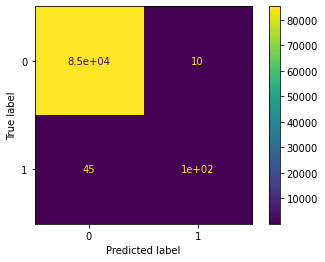

In [104]:
pipe_1.fit(X_train, y_train)
y_predict_XGBC = pipe_1.predict(X_test)
F1_SCORE_Reglo = f1_score(y_test,y_predict_XGBC, average='micro')
plot_confusion_matrix(pipe_1, X_test, y_test) 
print(F1_SCORE_Reglo)

In [105]:
print(classification_report(y_test,y_predict_XGBC))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.91      0.70      0.79       148

    accuracy                           1.00     85443
   macro avg       0.96      0.85      0.89     85443
weighted avg       1.00      1.00      1.00     85443



# Regresion Logistica

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
LR = LogisticRegression()
pipe_2 = Pipeline(steps=[('scaler', StandardScaler()),("PCA",PCA(n_components = 19)), ('LR', LR)])




score = cross_val_score(pipe_2,X_train,y_train.ravel(),cv=10,scoring='f1_micro')


print("f1 micro promedio ", score.mean())

f1 micro promedio  0.9987058861718587


0.9990754069964772


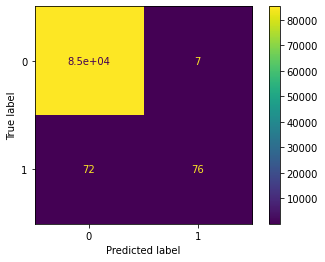

In [100]:
from sklearn.metrics import plot_confusion_matrix
pipe_2.fit(X_train, y_train)
y_predict_RegLo = pipe_2.predict(X_test)
F1_SCORE_Reglo = f1_score(y_test,y_predict_RegLo, average='micro')
plot_confusion_matrix(pipe_2, X_test, y_test) 
print(F1_SCORE_Reglo)

In [98]:
print(classification_report(y_test,y_predict_RegLo))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.92      0.51      0.66       148

    accuracy                           1.00     85443
   macro avg       0.96      0.76      0.83     85443
weighted avg       1.00      1.00      1.00     85443



# Conclusion

A pesar de que a primera vista todos los modelos parecen tener buenos resultados, existen diferencias considerables entre XGBC y la regresion logistica, debido a que la vara de medicion que finalmente se utilizo es el Recall, puesto que queremos evaluar realmente que tan efectivo es nuestro modelo para detectar fraudes.

¿ Esto es debido a que incluso solo generando predicciones que apunten a un "No fraude" se generaria un "Accuracy" de un 99.83%, es por eso que en este caso, al detectar mas fraudes y al tener un mejor Recall se ha elegido **XGBClassifier**